In [49]:
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import random

sys.path.append("..")
from llr import LLR 

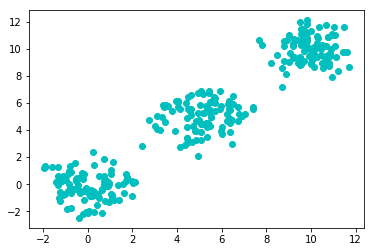

In [50]:
# Generate data of 100 samples from 3 Gaussians centered at (0, 0), (5, 5) and (10, 10)

n_samples = 100

# beta [0 1]
x_1, y = make_blobs(n_samples=n_samples, n_features=2, centers = [[0., 0.]], cluster_std=1.0)

# beta [1 0]
x_2, y = make_blobs(n_samples=n_samples, n_features=2, centers=[[5., 5.]], cluster_std=1.0)

# beta [1 1]
x_3, y = make_blobs(n_samples=n_samples, n_features=2, centers=[[10., 10.]], cluster_std=1.0)

# Merge the blobs into one data set 
X = np.block([[x_1], [x_2], [x_3]])
X_data = np.array(X)

y_1 = np.zeros(n_samples)
y_2 = np.zeros(n_samples)
y_3 = np.zeros(n_samples)


# Assign unique beta values to each blob
for i in range(0,n_samples): 
    y_1[i] = 1 + 0 * x_1[i,0] + x_1[i,1]
    y_2[i] = 1 + 1 * x_2[i,0] + 0*x_2[i,1]
    y_3[i] = 1 + x_3[i,0] + x_3[i,1]

# Merge the reponses into a signle array
y_data= np.concatenate((y_1, y_2, y_3))

# Plot the data set 
fig = plt.figure()
plt.plot(X_data[:, 0], X_data[:, 1], 'co')
plt.show()


Progress:  0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 

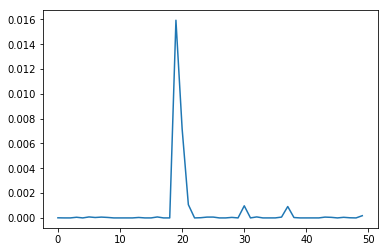

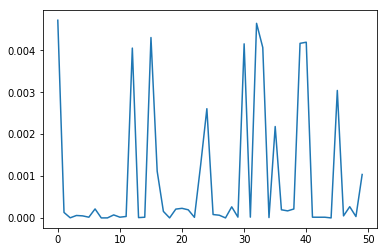

In [52]:
kf = KFold(n_splits=5, shuffle=True)

# Constants 
count = 0 
mu_index = 0
var = 0.5;
interation_count = 50
range_mu = 100
range_v = 100
perm_size = 50

# Initialize arrays with 0s 
MSE_test = np.zeros(interation_count)
MSE_train = np.zeros(interation_count)
MSE_avg_test = np.zeros(interation_count)
MSE_avg_train = np.zeros(interation_count)
mu_v_array = np.zeros(2*interation_count)

print("Progress: ", end = " ")
while (count < interation_count):
    
    if count is 0: 
        print(count, end = " ")
    else:
        print(",", count, end = " ")
        
    rand_mu = random.randint(1, range_mu)
    rand_v = random.randint(1, range_v)
    
    index=0
    
    for train_index, test_index in kf.split(X_data):
    
        X_train, X_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        
        p = len(X_train[0,:])
        n = len(X_train[:,0])
        
        llr = LLR()
        regression = llr.fit(X_train, y_train, rand_mu, rand_v/p, perm_size=perm_size, var, Graph=None)
        
        Y_train = regression.Y
        
        Y_test = regression.predict(X_test)
        
        MSE_test[index] = mean_squared_error(y_test, Y_test);
        MSE_train[index] = mean_squared_error(y_train, Y_train);
        index+=1

    mu_v_array[mu_index] = rand_mu
    mu_v_array[mu_index+1] = rand_v
    mu_index += 2
    MSE_avg_test[count] = np.average(MSE_test)
    MSE_avg_train[count] = np.average(MSE_train)
    count+=1  
            
fig = plt.figure()
plt.plot(range(0, interation_count), MSE_avg_test)
plt.show()

plt.plot(range(0, interation_count), MSE_avg_train)
plt.show()
    

In [47]:
# Print the mu and v with the smalles MSE
min_index = np.argmin(MSE_avg_test)
print("mu=", mu_v_array[2*min_index])
print("v=", mu_v_array[2*min_index+1])

mu= 85.0
v= 40.0
